# Analise chocolura sazonalidade

In [118]:
import pandas as pd
from pandas.plotting import autocorrelation_plot
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

In [119]:
vendas = pd.read_csv("chocolura.csv")
vendas.head()



,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [120]:
vendas.dtypes

mes       object
vendas     int64
dtype: object

In [121]:
print('A Quantidade de linhas e colunas :', vendas.shape)
print("Quantidades de dados nulos:", vendas.isna().sum().sum())

A Quantidade de linhas e colunas : (24, 2)
Quantidades de dados nulos: 0


In [122]:
vendas["mes"] = pd.to_datetime(vendas["mes"])
vendas.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [123]:
vendas['aumento'] = vendas['vendas'].diff()
vendas['aceleracao'] = vendas['aumento'].diff()
vendas.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


In [124]:
sns.set_palette('Accent')
sns.set_style('darkgrid')




In [125]:
def plotar(titulo, labelx, labely, x, y, dataset ):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x = x, y = y, data = dataset)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo, loc="left",fontsize = 18 )
    ax.set_xlabel(labelx, fontsize = 14)
    ax.set_ylabel(labely, fontsize = 14)
    ax = ax

In [126]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
    plt.figure(figsize = (16,12))
    ax = plt.subplot(3,1,1)
    ax.set_title(titulo, fontsize = 18, loc = "left")
    ax = sns.lineplot(x = x, y = y1, data = dataset)
    plt.subplot(3,1,2)
    ax = sns.lineplot(x = x, y = y2, data = dataset)
    plt.subplot(3,1,3)
    ax = sns.lineplot(x = x, y = y3, data = dataset)
    ax = ax

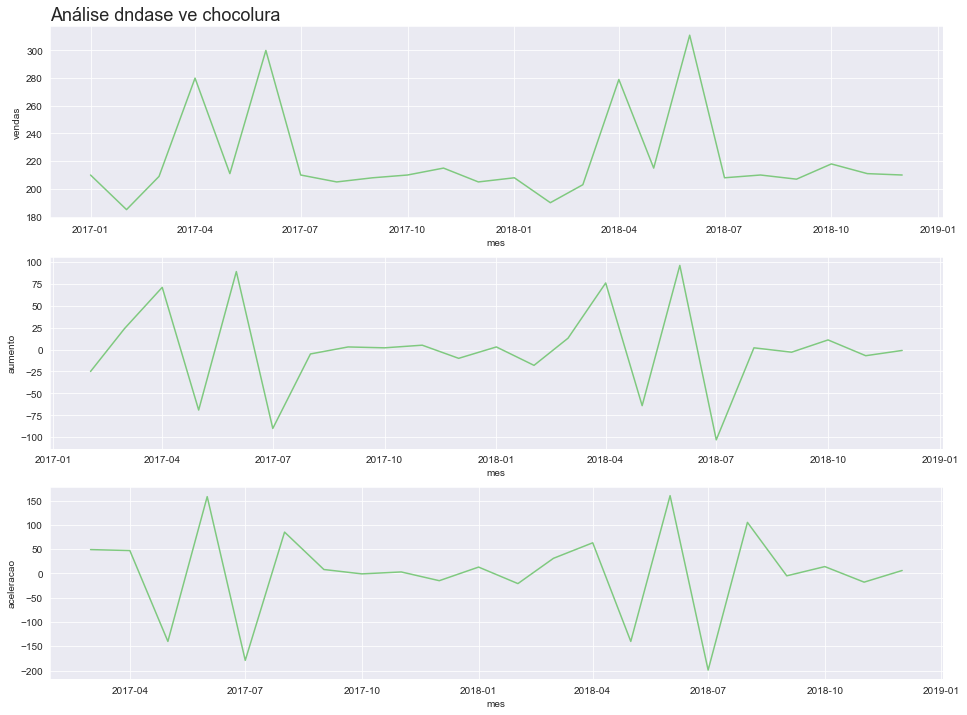

In [127]:
plot_comparacao("mes","vendas","aumento", "aceleracao", vendas, "Análise dndase ve chocolura")

### Investigando a sazonalidade, Chocolura  - Vendas diárias(Outubro e Novembro)

In [128]:
vendas_por_dia = pd.read_csv("vendas_por_dia.csv")

In [129]:
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [130]:
print("Quantidade de linhas e colunas:" ,vendas_por_dia.shape)
print("Quantidade de dados nulos: ", vendas_por_dia.isna().sum().sum())

Quantidade de linhas e colunas: (61, 2)
Quantidade de dados nulos:  0


In [131]:
vendas_por_dia.dtypes

dia       object
vendas     int64
dtype: object

In [132]:
vendas_por_dia["dia"] = pd.to_datetime(vendas_por_dia["dia"])
vendas_por_dia.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [133]:
vendas_por_dia["aumento"] = vendas_por_dia["vendas"].diff()
vendas_por_dia["aceleracao"] = vendas_por_dia["aumento"].diff()
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


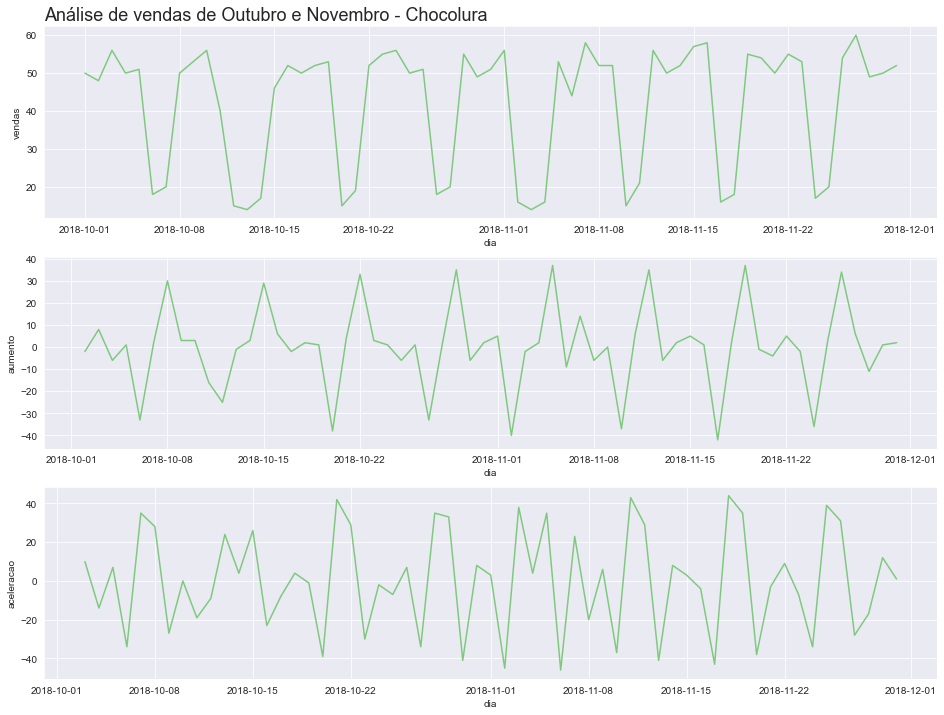

In [134]:
plot_comparacao("dia", "vendas", "aumento", "aceleracao", vendas_por_dia, "Análise de vendas de Outubro e Novembro - Chocolura")

### Análisando a Sazonalidade

In [135]:
vendas_por_dia["dia_da_semana"] = vendas_por_dia ["dia"].dt.day_name()

In [136]:
vendas_por_dia["dia_da_semana"] .unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [137]:
dias_traduzidos = {"Monday" : "Segunda", "Tuesday" : "Terca", "Wednesday" : "Quarta", "Thursday": "Quinta",
                  "Friday": "Sexta", "Saturday": "Sabado", "Sunday" : "Domingo"}


In [138]:
vendas_por_dia["dia_da_semana"] = vendas_por_dia["dia_da_semana"].map(dias_traduzidos)
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terca
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta


In [139]:
vendas_por_dia.head(14)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terca
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta
5,2018-10-06,18,-33.0,-34.0,Sabado
6,2018-10-07,20,2.0,35.0,Domingo
7,2018-10-08,50,30.0,28.0,Segunda
8,2018-10-09,53,3.0,-27.0,Terca
9,2018-10-10,56,3.0,0.0,Quarta


# Agrupando os dias

In [140]:
vendas_agrupadas = vendas_por_dia.groupby("dia_da_semana")["vendas", "aumento", "aceleracao"].mean().round()

<ipython-input-140-86b5e33a51d4>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  vendas_agrupadas = vendas_por_dia.groupby("dia_da_semana")["vendas", "aumento", "aceleracao"].mean().round()


In [141]:
vendas_agrupadas

,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Sabado,16.0,-28.0,-20.0
Segunda,52.0,34.0,31.0
Sexta,45.0,-7.0,-5.0
Terca,52.0,-1.0,-34.0


# Correlaçao das vendas diárias

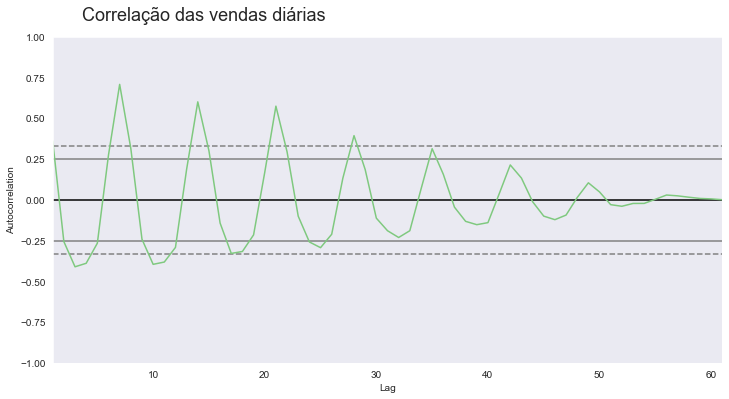

In [142]:
ax = plt.figure(figsize =(12,6))
ax.suptitle("Correlação das vendas diárias", fontsize = 18, x = 0.3, y = 0.95 )
autocorrelation_plot(vendas_por_dia["vendas"])
ax = ax

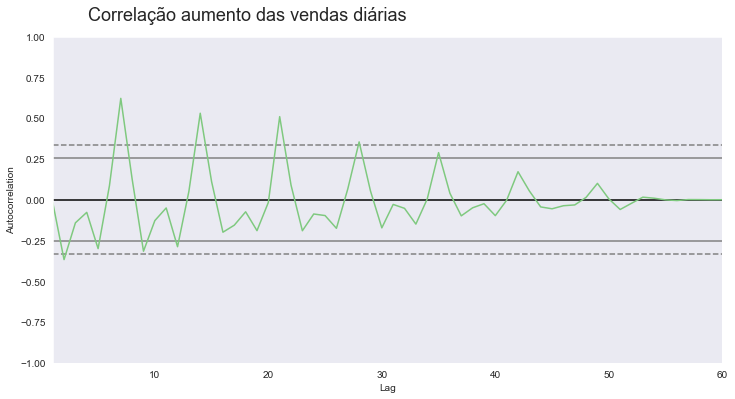

In [143]:
ax = plt.figure(figsize =(12,6))
ax.suptitle("Correlação aumento das vendas diárias", fontsize = 18, x = 0.35, y = 0.95 )
autocorrelation_plot(vendas_por_dia["aumento"][1:])
ax = ax

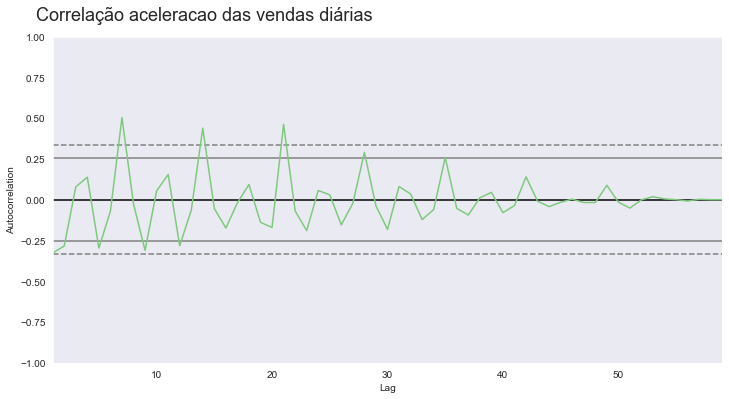

In [144]:
ax = plt.figure(figsize =(12,6))
ax.suptitle("Correlação aceleracao das vendas diárias", fontsize = 18, x = 0.3, y = 0.95 )
autocorrelation_plot(vendas_por_dia["aceleracao"][2:])
ax = ax

# Cafelura - Análise de vendas

In [145]:
cafelura = pd.read_csv("cafelura.csv")

In [146]:
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [147]:
cafelura.dtypes

mes       object
vendas     int64
dtype: object

In [148]:
cafelura["mes"] = pd.to_datetime(cafelura["mes"])

In [149]:
cafelura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [150]:
print ("Quantidade de linhas e colunas:", cafelura.shape)

Quantidade de linhas e colunas: (24, 2)


In [151]:
print("Quantidade de dados nulos: ",cafelura.isna().sum().sum())

Quantidade de dados nulos:  0


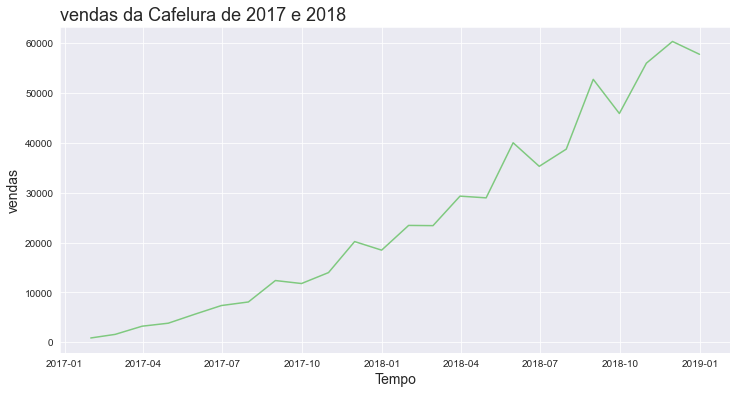

In [152]:
plotar("vendas da Cafelura de 2017 e 2018", "Tempo", "vendas", "mes","vendas", cafelura )

In [153]:
quantidade_de_dias_de_fds = pd.read_csv("dias_final_de_semana.csv")

In [154]:
quantidade_de_dias_de_fds.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [155]:
quantidade_de_dias_de_fds["quantidade_de_dias"].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8], dtype=int64)

In [156]:
cafelura["vendas_normalizadas"] = cafelura["vendas"] / quantidade_de_dias_de_fds["quantidade_de_dias"].values

In [157]:
cafelura.head()

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


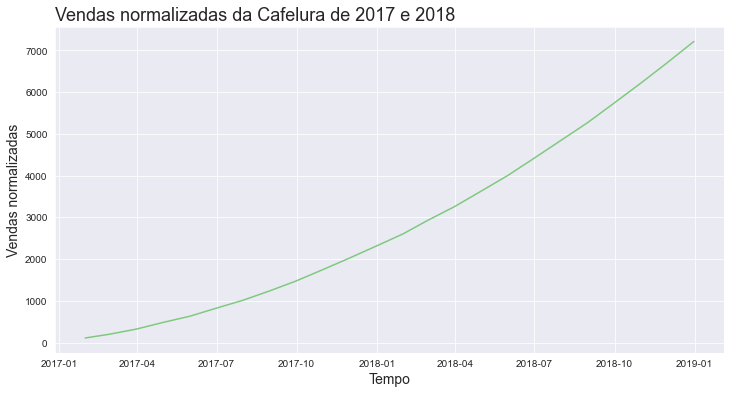

In [158]:
plotar("Vendas normalizadas da Cafelura de 2017 e 2018", "Tempo", "Vendas normalizadas", "mes","vendas_normalizadas",
      cafelura)

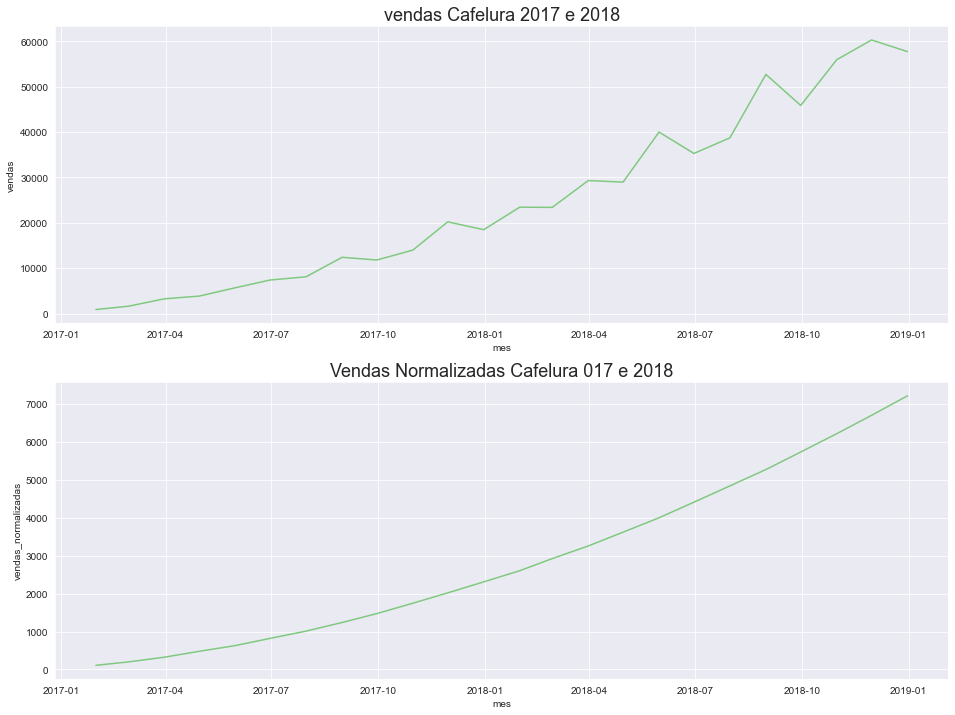

In [159]:
plt.figure(figsize = (16,12))
ax = plt.subplot(2,1,1)
ax.set_title("vendas Cafelura 2017 e 2018", fontsize = 18)
sns.lineplot(x = "mes", y = "vendas", data = cafelura)
ax = plt.subplot(2,1,2)
ax.set_title("Vendas Normalizadas Cafelura 017 e 2018", fontsize = 18)
sns.lineplot(x = "mes", y = "vendas_normalizadas", data = cafelura)
ax = ax

# Statsmodel

In [160]:
from statsmodels.tsa.seasonal import seasonal_decompose

<ipython-input-165-af3a85812081>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  resultado = seasonal_decompose(chocolura['vendas'],  freq=3)


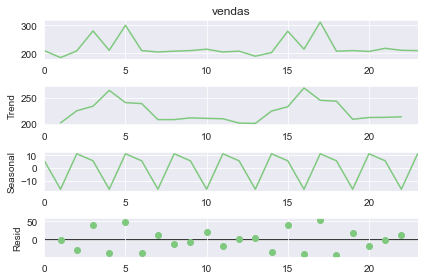

In [165]:
resultado = seasonal_decompose(chocolura['vendas'],  freq=3)
ax = resultado.plot()

In [166]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [170]:
data = ({
    "observacao":observacao,
    "tendencia": tendencia,
    "sazonalidade" : sazonalidade,
    "ruido": ruido
    })
resultado = pd.DataFrame(data)
resultado.head()

,observacao,tendencia,sazonalidade,ruido
0,210.0,NaN,5.603175,NaN
1,185.0,201.333333,-16.730159,0.396825
2,209.0,224.666667,11.126984,-26.793651
3,280.0,233.333333,5.603175,41.063492
4,211.0,263.666667,-16.730159,-35.936508


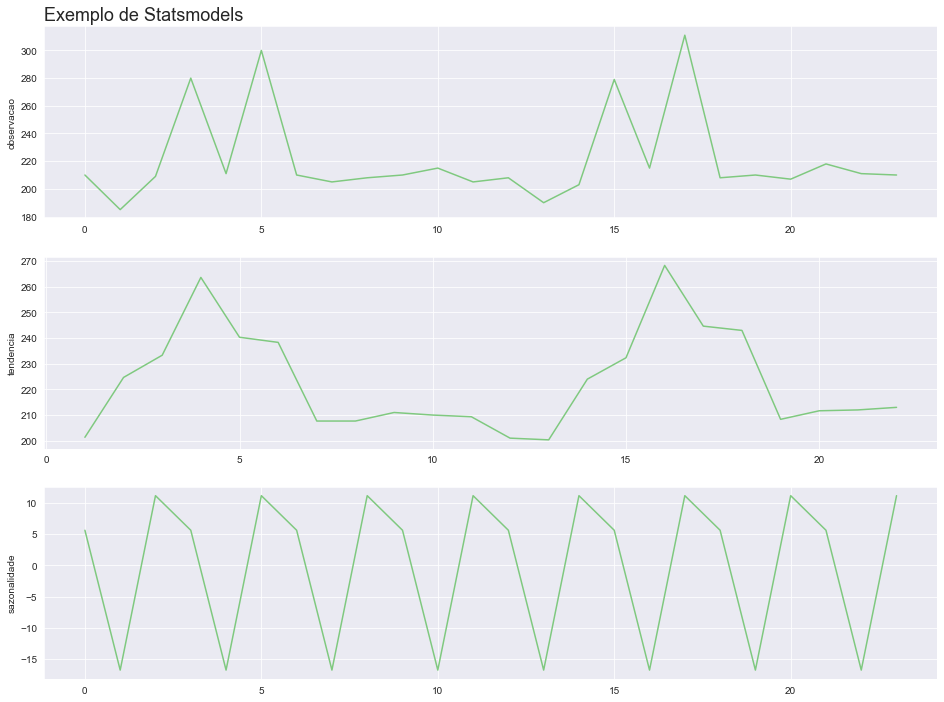

In [174]:
plot_comparacao(resultado.index, "observacao", "tendencia", "sazonalidade", resultado, "Exemplo de Statsmodels")

# Alucel - Análise de vendas

In [176]:
alucel = pd.read_csv("alucel.csv")

In [177]:
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [178]:
alucel.dtypes

dia        object
vendas    float64
dtype: object

In [179]:
alucel["dia"] = pd.to_datetime(alucel["dia"])
alucel.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

In [181]:
alucel.isna().sum().sum()

0

In [183]:
alucel.shape

(61, 2)

In [185]:
alucel ["aumento"] = alucel["vendas"].diff()
alucel["aceleracao"] = alucel["aumento"].diff()
alucel.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


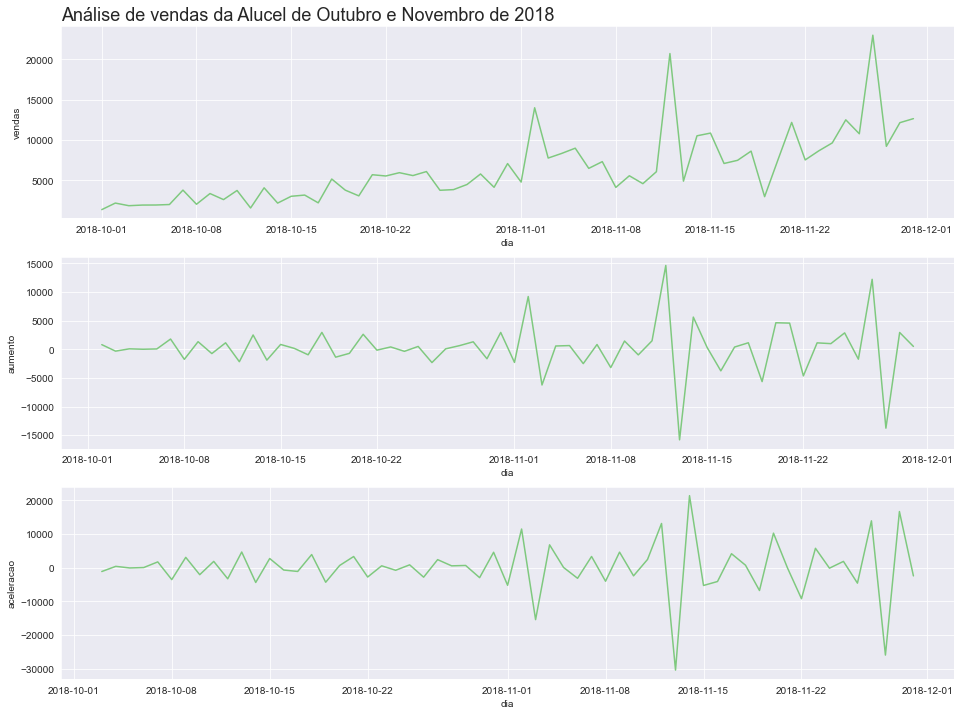

In [187]:
plot_comparacao("dia","vendas", "aumento", "aceleracao", alucel, "Análise de vendas da Alucel de Outubro e Novembro de 2018")

# Média Móvel

In [188]:
alucel["media_movel"] = alucel["vendas"].rolling(7).mean()

In [191]:
alucel.head(7)

,dia,vendas,aumento,aceleracao,media_movel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429


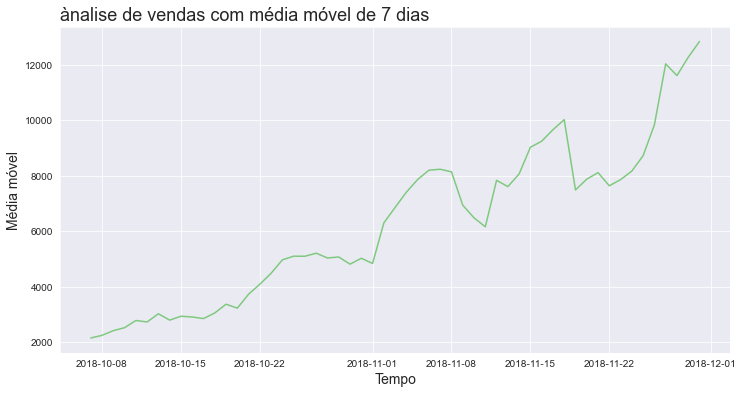

In [194]:
plotar("ànalise de vendas com média móvel de 7 dias","Tempo", "Média móvel", "dia", "media_movel", alucel)

In [202]:
alucel["media_movel_14"] = alucel["vendas"].rolling(14).mean()

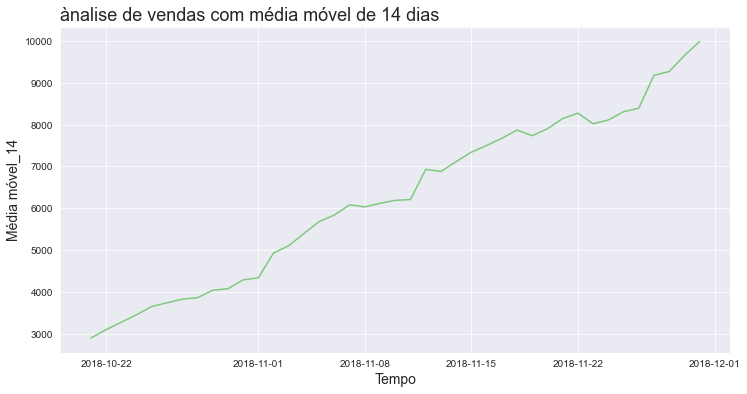

In [203]:
plotar("ànalise de vendas com média móvel de 14 dias","Tempo", "Média móvel_14", "dia", "media_movel", alucel)

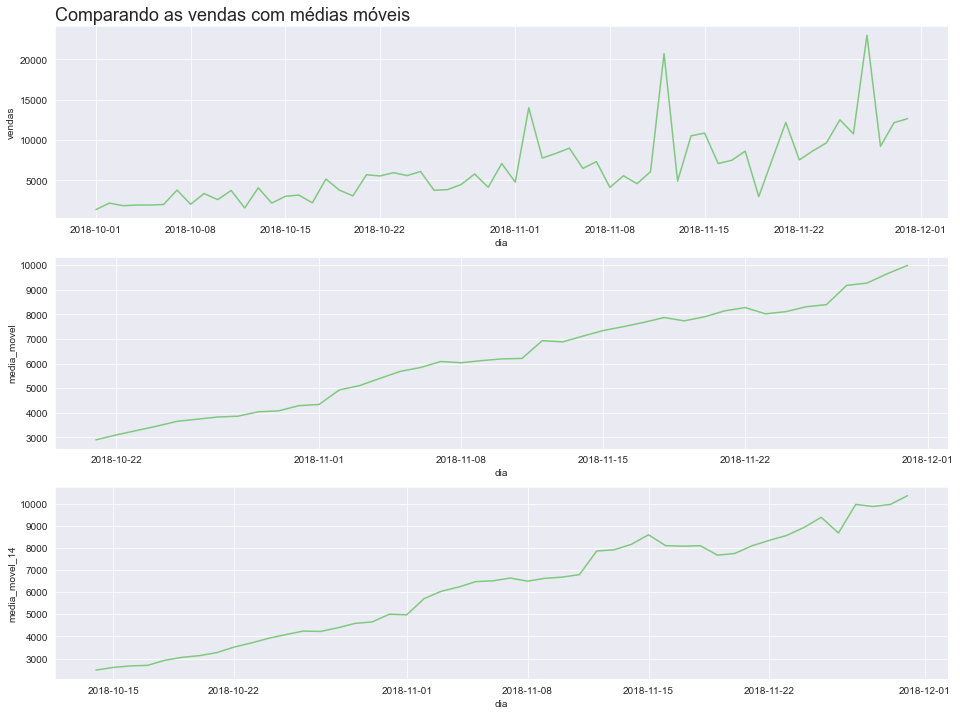

In [204]:
plot_comparacao("dia", "vendas", "media_movel", "media_movel_14", alucel, "Comparando as vendas com médias móveis" )